Plotting from: 
['./tables/spa_the_rs_2001.csv', './tables/spa_the_rs_1501.csv', './tables/spa_the_rs_0501.csv']
Creating ./graphs/plot__2001__1501__0501.png ...


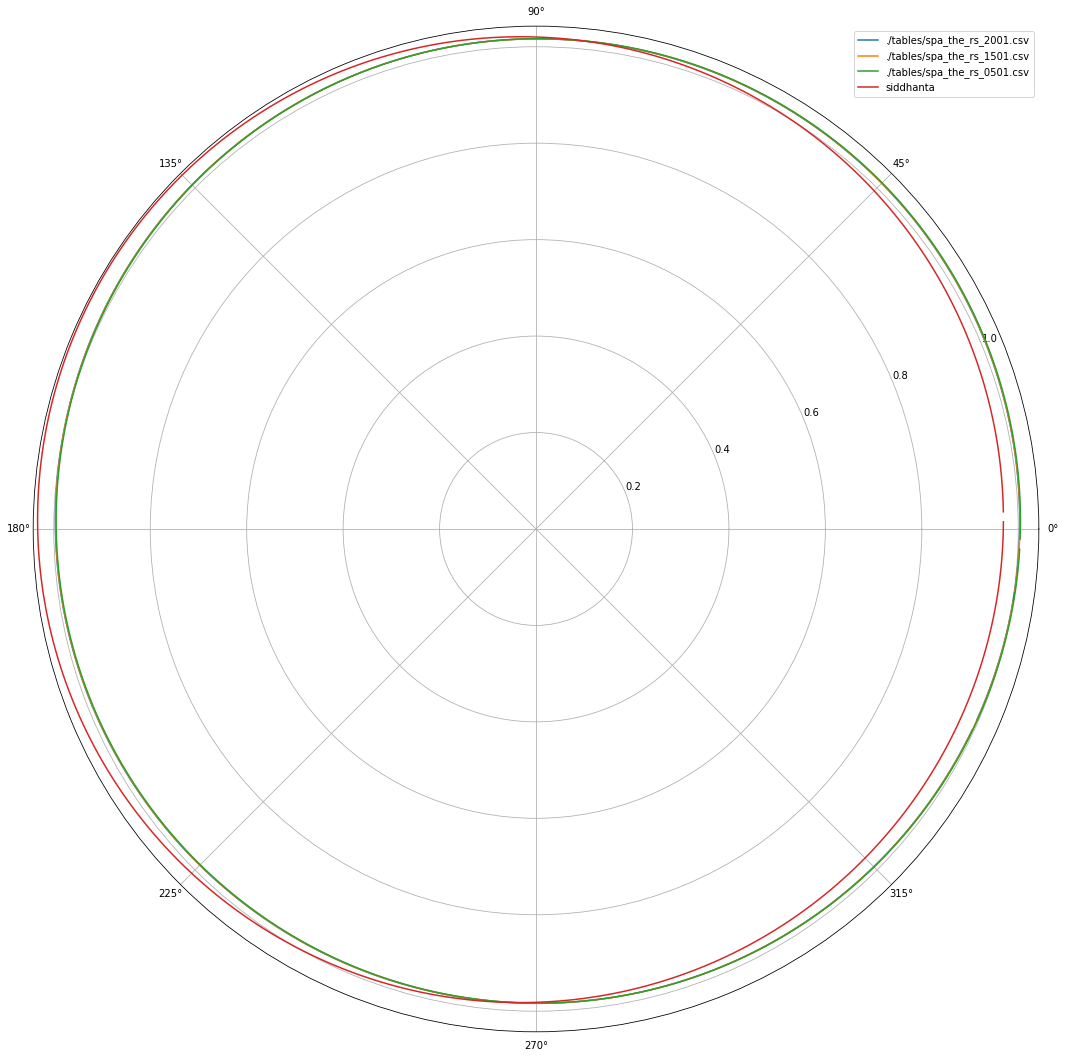

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from date_list_generator import m
from PIL import Image

import sys 
import os
sys.path.append(os.path.abspath("~/vAkyapaJcAGgam/SPA_c_implementation"))
import siddhanta_model

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

d2r = np.pi/180
r0 = 0

with open("./outputs/plot_list.txt") as file:
    lines = [line.rstrip() for line in file]

print("Plotting from: ")
print(lines)

plt.figure(figsize=(10,10))

plotfilename = "./graphs/plot"

for i in range(len(lines)):
    line = lines[i]
    plot_data = pd.read_csv(line)

    theta_nas = plot_data['theta_na']
    rs = plot_data['r']
    plt.polar(theta_nas*d2r, rs-r0, label="%s"%line)
    plotfilename = plotfilename + '_' + line[-9:-4]

m=78

theta_nas = [siddhanta_model.theta_t(ag,m)*d2r for ag in range(0, 365)]
rs = [siddhanta_model.K(ag,m)-r0 for ag in range(0, 365)]
plt.polar(theta_nas, rs, label='siddhanta')

print("Creating %s.png ..."%plotfilename)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)
img = fig2img(fig)
img.save('%s.png'%plotfilename)

plt.show()

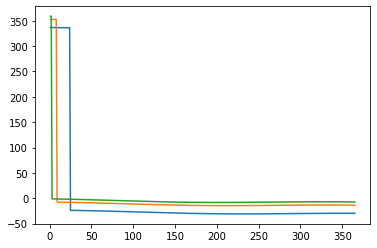

In [12]:
with open("./outputs/plot_list.txt") as file:
    lines = [line.rstrip() for line in file]
for i in range(len(lines)):
    line = lines[i]
    plot_data = pd.read_csv(line)
    theta_nas = plot_data['theta_na']
    rs = plot_data['r']
    plt.plot(np.linspace(1, 365, 365), theta_nas-np.linspace(0, 365, 365), label="true values")
    plotfilename = plotfilename + '_' + line[-9:-4]
# plt.ylim([-10,0])
plt.show()

In [13]:
import numpy as np
from astropy import units as u
from astropy.coordinates import Angle

theta_na_m = Angle('78 degrees')
theta_na_0 = -Angle('2:6:58 degrees')
rate = Angle('0:59:8.2 degrees')

theta_na_t = lambda t_0, t_m: t_0 - np.rad2deg(np.arcsin((13.5/360)*np.sin(np.deg2rad(t_0-t_m))))

theta_na_0 = theta_na_0+rate*150

print(theta_na_0)
print(theta_na_t(theta_na_0, theta_na_m))
print(Angle('150 degrees')-theta_na_t(theta_na_0, theta_na_m))

145d43m32s
143d44m12.8216s
6d15m47.1784s


In [14]:
T_SD = Angle('23:56:4.091 hours')
T_SY = Angle('06:09:10 hours')
# T_SY = Angle('6.15277777777777 hours')
T_SY = 365.256363004*24
T_SD = 23.93446972222222
T_CD = Angle('23.999997580335318 hours')
print(1/(1/T_SD - 1/T_SY))
print(T_CD)

23.99999758082764
23h59m59.9913s


In [15]:
print(1/(1/(Angle('17:20:24 degrees'))))

17.34 deg


In [16]:
ayanamsha = lambda year, month, day: 16.90709*(year/1000) - 0.757371*(year/1000)*(year/1000) - 6.92416 + 0.0011574074*(month - 1 + day/30)

print(ayanamsha(2023, 1, 8))
print(Angle('22:27:37 degrees'))

24.179628930714333
22d27m37s


In [17]:
import astropy
from astropy import units as u
print(astropy.time.Time("2023-01-01 00:00:00", scale="utc").jd)

# d = 2280617.5 - 2415020
# print(((50.2564/3600) + (0.000222/3600)*(d/365.25))*3600)

def get_ayanamsha(julian_day):
    d = julian_day - 2280627.5
    # return 22.460277777777776 + (50.2564/3600)*d/365.25 + (0.000222/3600)*(d/365.25)**2
    return 17.327222222222222 + (50.17470977412731/3600)*d/365.25 + (0.000222/3600)*(d/365.25)*(d/365.25)

print(get_ayanamsha(2459945.5)*u.deg-Angle('0:0:0 degrees'))


2459945.5
24d11m04.5776s
